In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [5]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
data=df.iloc[:,3:]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'Annual Income vs Spending Score')

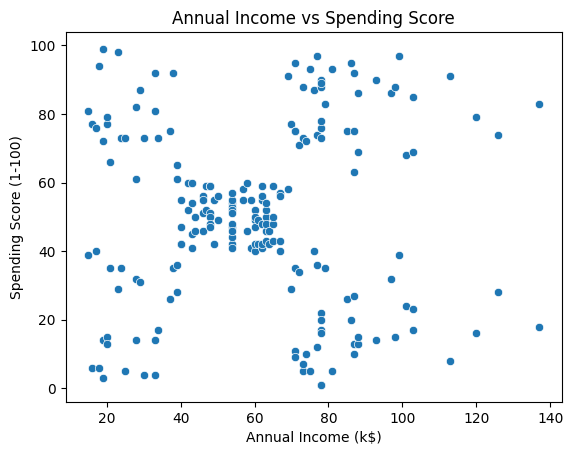

In [31]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title('Annual Income vs Spending Score')


In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=3).fit(data)
kmeans

KMeans(n_clusters=3)

In [10]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [11]:
kmeans.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

In [12]:
kmeans.inertia_

106348.37306211119

In [13]:
wcss=[]

In [14]:
for k in range (1,15):
 kmeans=KMeans(n_clusters=k)
 kmeans.fit(data)
 wcss.append(kmeans.inertia_)

In [15]:
wcss

[269981.28000000014,
 181363.59595959607,
 153105.0136415919,
 97044.66783625723,
 44454.47647967972,
 40845.0821432953,
 30259.657207285458,
 28405.406633906725,
 22977.944789843717,
 20707.844479988966,
 18598.87341547341,
 17611.282972052464,
 15696.30068483699,
 14291.869402819411]

Text(0, 0.5, 'WCSS')

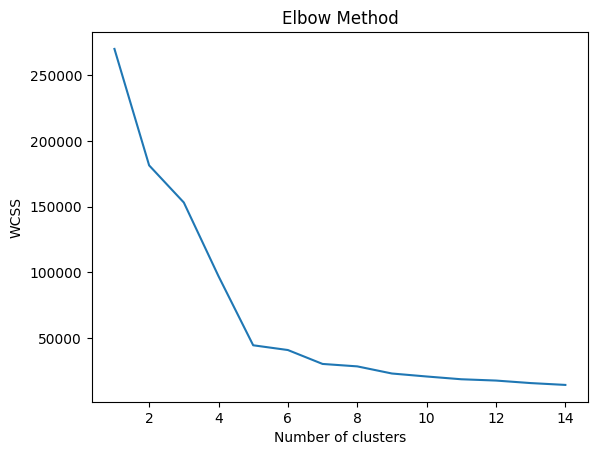

In [36]:
sns.lineplot(x = list(range(1,15)) , y = wcss)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [17]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [18]:
labels = km.fit_predict(data)

In [19]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [20]:
km.inertia_

44448.45544793369

In [21]:
centers=km.cluster_centers_
centers

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

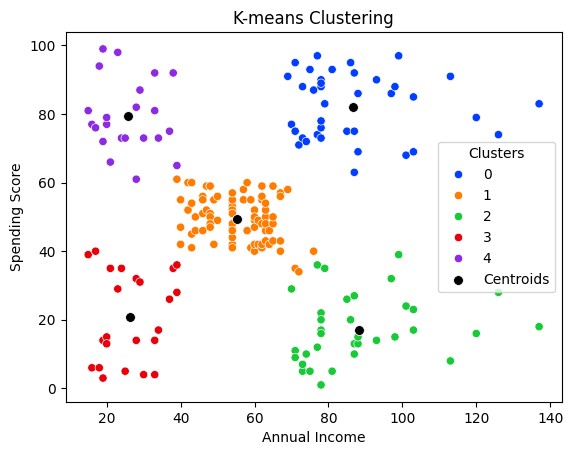

In [22]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)",  hue=labels, palette='bright')
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=50, color='black', marker='o', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Clusters')
plt.show()

In [23]:
clustered_data = data.copy()
clustered_data['Cluster'] = labels
clustered_data

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


In [24]:
km.predict([[15,40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [25]:
km.predict([[120,80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
aglclustering = AgglomerativeClustering(n_clusters=5).fit(data)
aglclustering

AgglomerativeClustering(n_clusters=5)

In [28]:
aglabels=aglclustering.labels_
aglabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

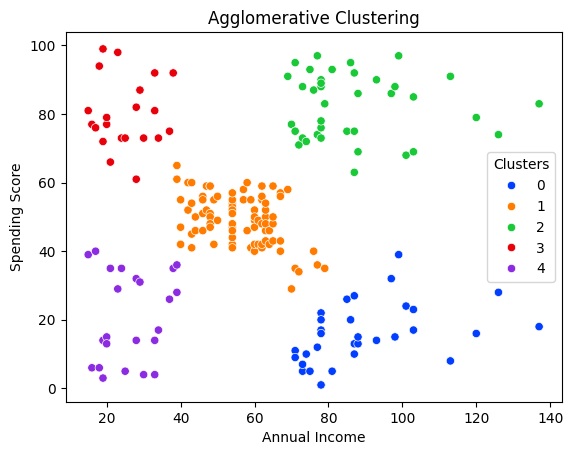

In [29]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=aglabels, palette='bright')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Clusters')


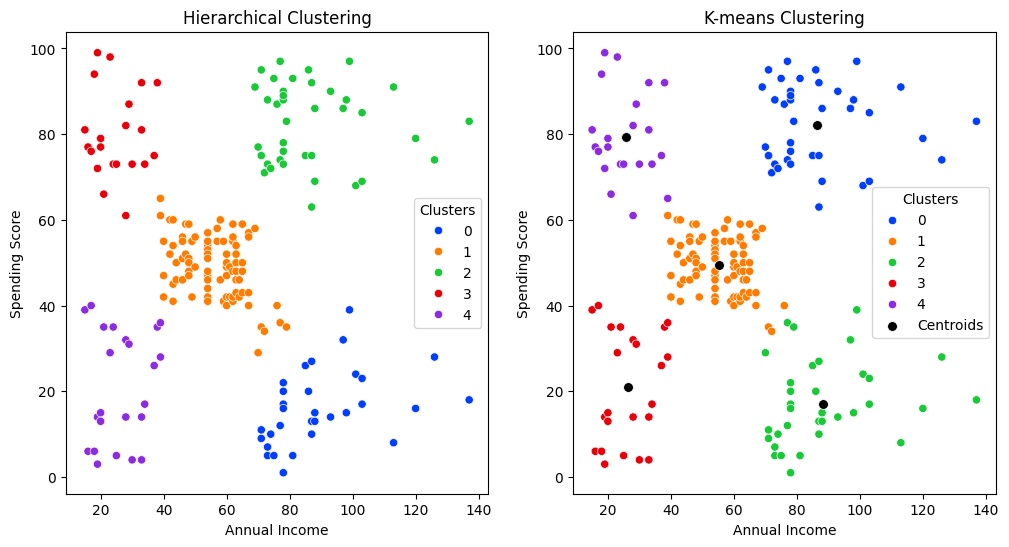

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=aglabels, palette='bright')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Clusters')

plt.subplot(1,2,2)
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)",  hue=labels, palette='bright')
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=50, color='black', marker='o', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Clusters')
plt.show()

In [45]:
from scipy.cluster.hierarchy import dendrogram , linkage

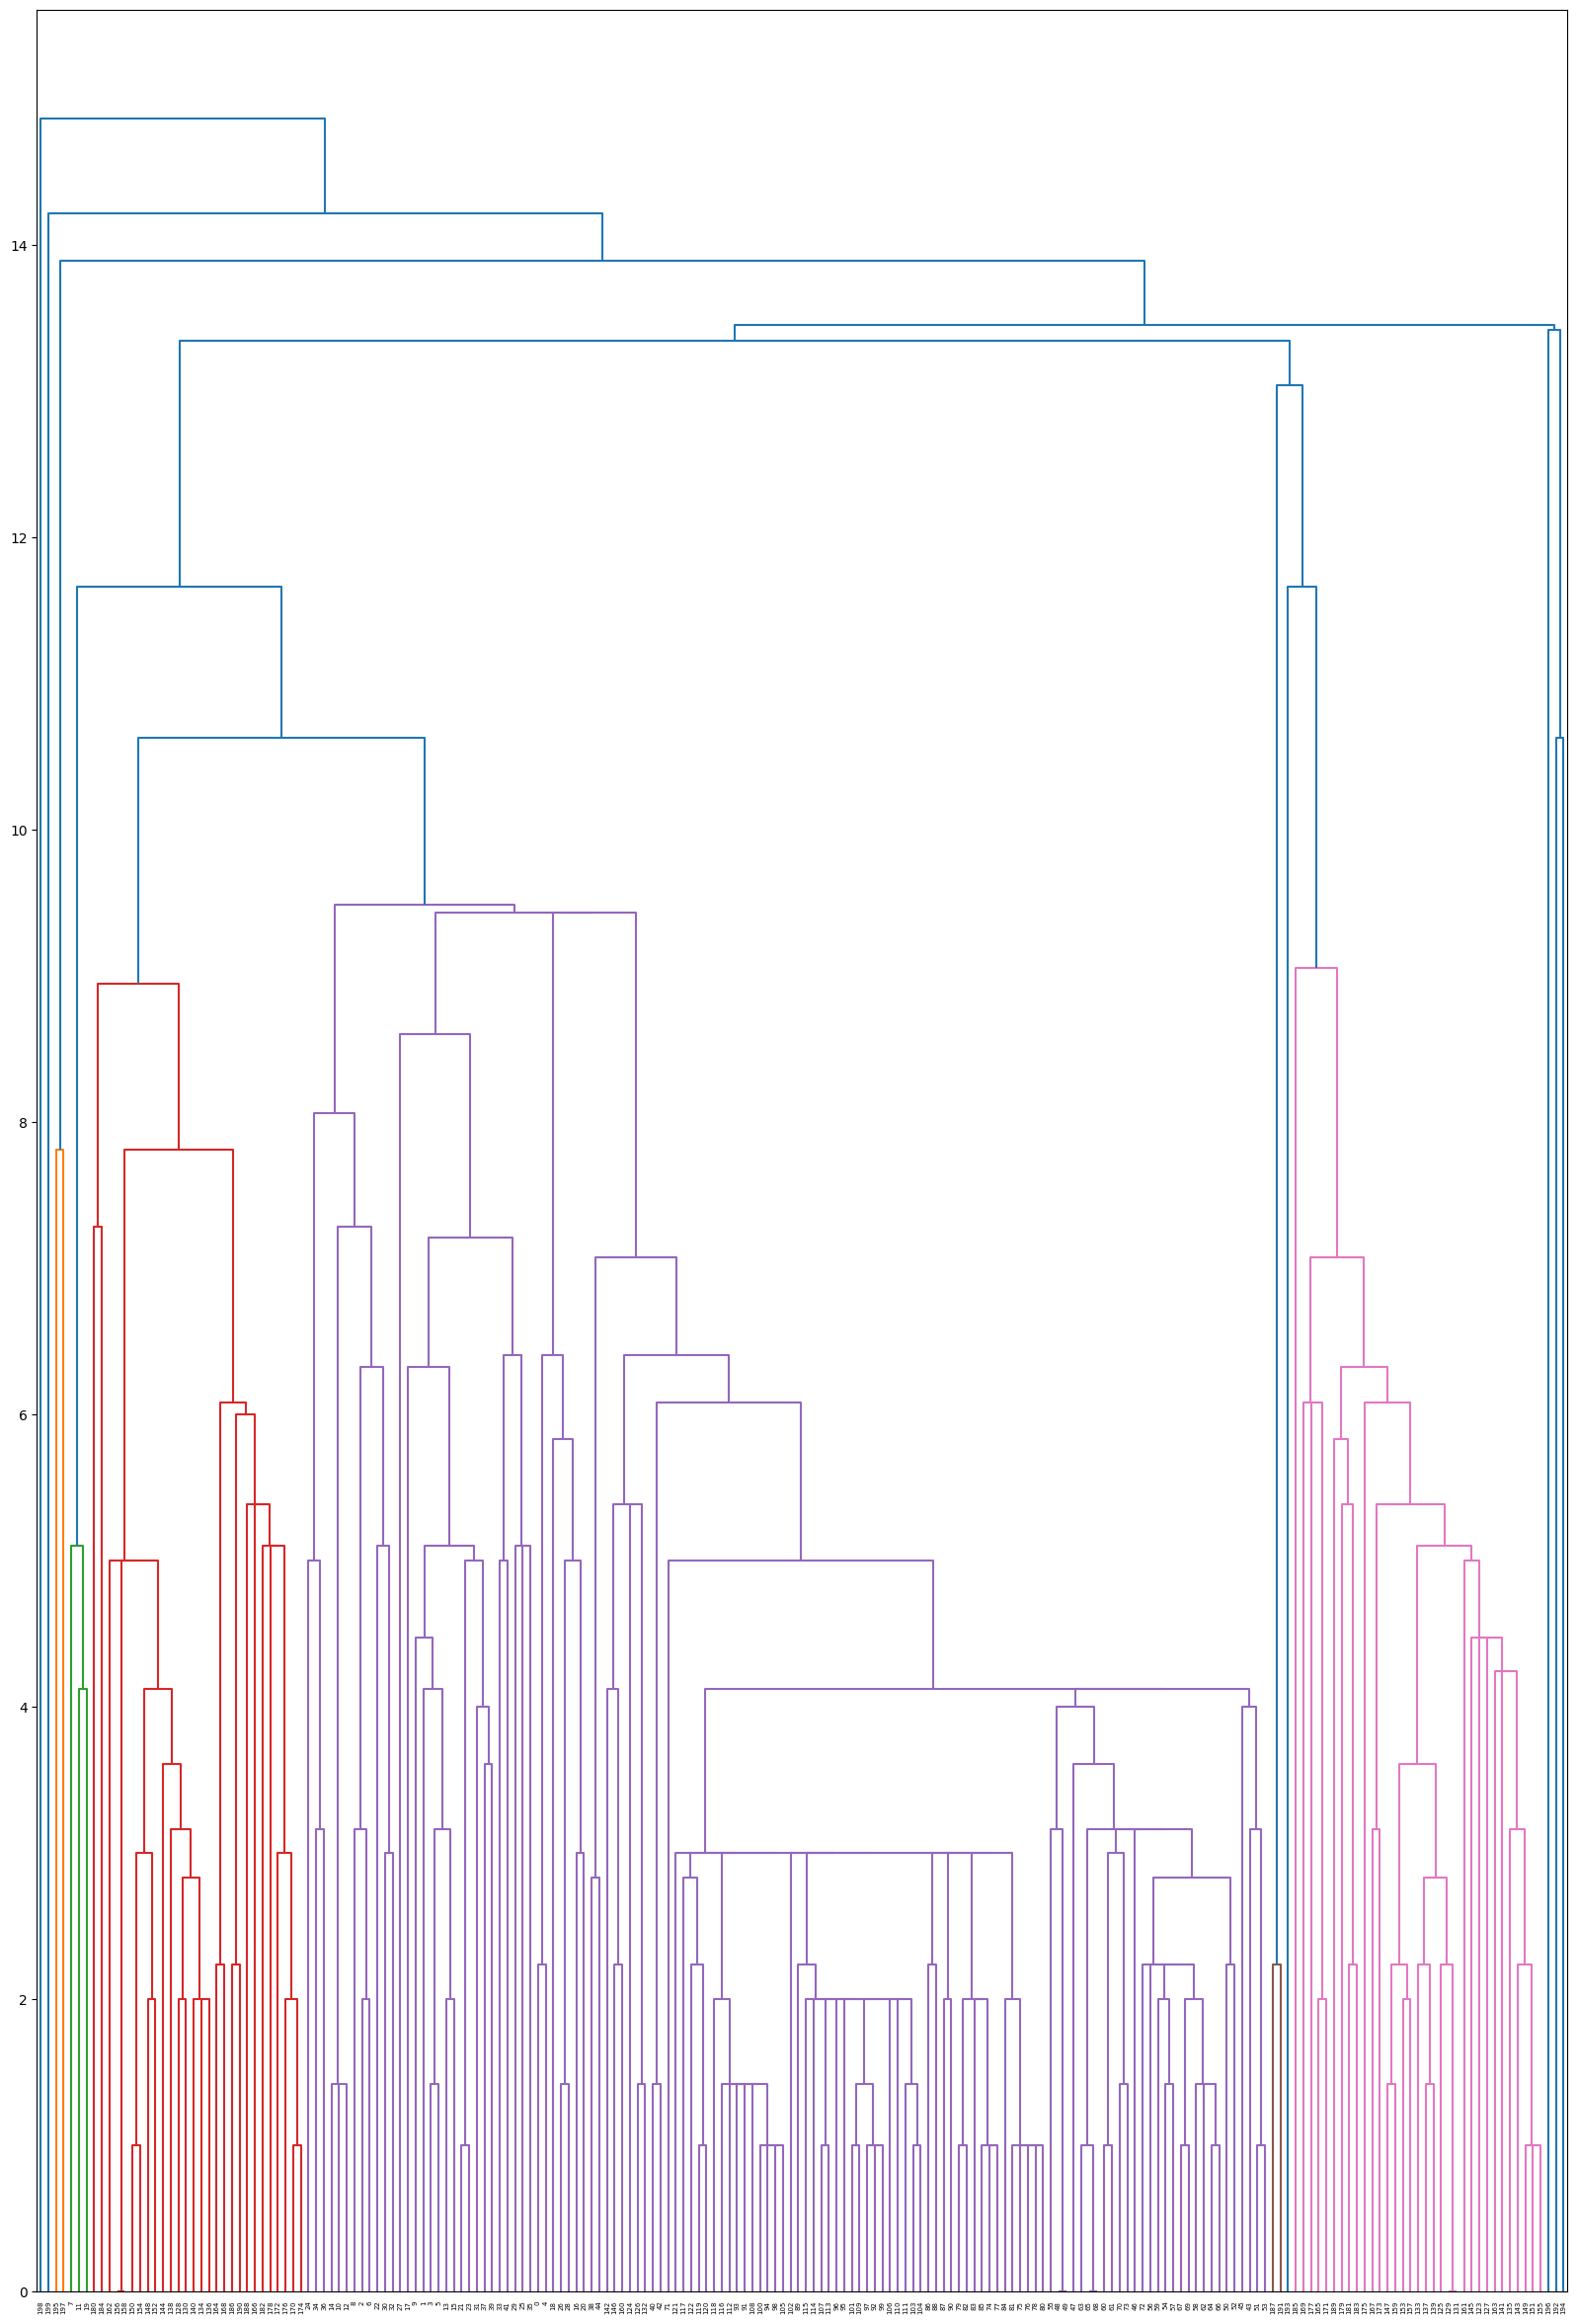

In [46]:
Z = hierarchy.linkage(data, 'single')
plt.figure(figsize = (20,30))
dn = dendrogram(Z)